In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
curr = pd.read_excel(r'C:\Users\hp\Documents\Time Series\Currency.xlsx', index_col='Date', parse_dates=True)

In [3]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012


In [4]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011


In [5]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2023-03-08 to 2015-01-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
 1   Open    1968 non-null   float64
 2   High    1968 non-null   float64
 3   Low     1968 non-null   float64
 4   Volume  1968 non-null   object 
 5   Chg%    1968 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.6+ KB


In [6]:
curr = curr.sort_index(ascending=[True])

In [7]:
curr.head()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2015-01-30,62.23,62.19,62.35,62.00,1.63M,0.0011
2015-02-02,62.12,62.31,62.35,62.05,1.03M,-0.0018
2015-02-03,61.99,61.92,62.14,61.90,1.42M,-0.0021
2015-02-04,62.04,61.90,62.15,61.82,1.19M,0.0008
2015-02-05,61.97,62.15,62.24,61.93,1.18M,-0.0011


In [8]:
curr.tail()

,Price,Open,High,Low,Volume,Chg%
Date,,,,,,
2023-03-01,82.61,82.64,82.75,82.49,2.45M,-0.0012
2023-03-02,82.71,82.60,82.72,82.60,1.38M,0.0011
2023-03-03,82.07,82.55,82.60,82.02,3.95M,-0.0076
2023-03-06,82.03,81.95,82.07,81.71,3.35M,-0.0006
2023-03-08,82.12,82.21,82.38,82.08,2.96M,0.0011


In [9]:
curr.drop(['Open', 'High', 'Low', 'Volume', 'Chg%'], axis=1, inplace=True)

In [10]:
curr.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [11]:
curr.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


In [12]:
curr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1968 entries, 2015-01-30 to 2023-03-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1968 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [13]:
curr_train = curr.loc[:'2022']
curr_test  = curr.loc['2023':]

In [14]:
curr_train.head()

,Price
Date,
2015-01-30,62.23
2015-02-02,62.12
2015-02-03,61.99
2015-02-04,62.04
2015-02-05,61.97


In [15]:
curr_train.tail()

,Price
Date,
2022-12-26,82.69
2022-12-27,82.86
2022-12-28,82.92
2022-12-29,82.96
2022-12-30,82.84


In [16]:
curr_test.head()

,Price
Date,
2023-01-02,82.93
2023-01-03,83.12
2023-01-04,82.92
2023-01-05,82.56
2023-01-06,82.78


In [17]:
curr_test.tail()

,Price
Date,
2023-03-01,82.61
2023-03-02,82.71
2023-03-03,82.07
2023-03-06,82.03
2023-03-08,82.12


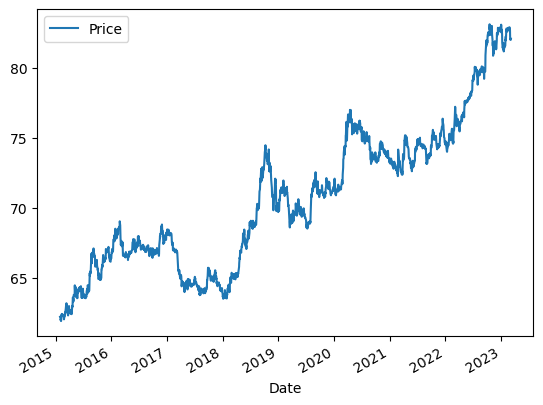

In [18]:
fig, ax = plt.subplots()
curr.plot(ax=ax)
plt.show()

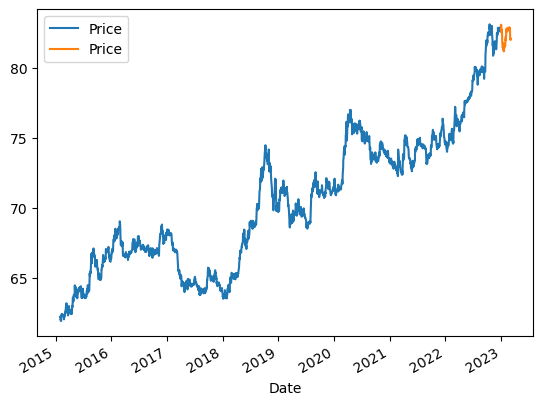

In [19]:
fig, ax1 = plt.subplots()
curr_train.plot(ax=ax1)
curr_test.plot(ax=ax1)
plt.show()

In [20]:
prediction_date = curr_test.index

In [21]:
result = adfuller(curr)
print(result)

(-0.5458712324322263, 0.8827499715022007, 4, 1963, {'1%': -3.4336856453443994, '5%': -2.863013493272342, '10%': -2.5675544273932758}, 29.841516953808878)


In [22]:
result = adfuller(curr.diff().dropna())
print(result)

(-21.48923883687631, 0.0, 3, 1963, {'1%': -3.4336856453443994, '5%': -2.863013493272342, '10%': -2.5675544273932758}, 26.08693041359402)


In [23]:
curr_diff = curr.diff().dropna()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


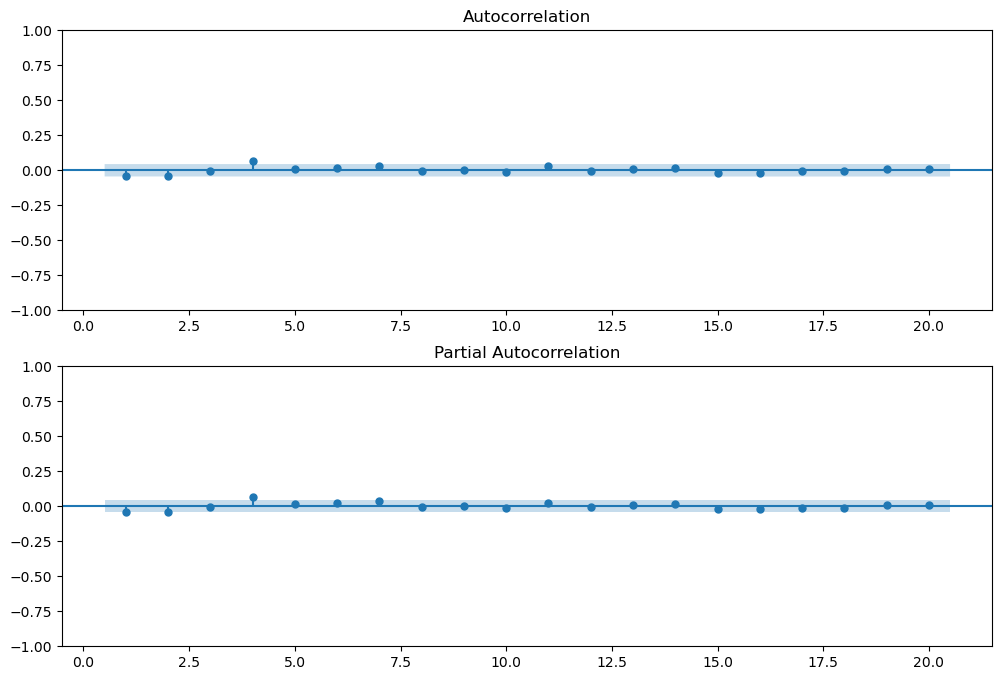

In [24]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(curr_diff, lags=20, zero=False, ax=ax1)

plot_pacf(curr_diff, lags=20, zero=False, ax=ax2)

plt.show()

In [30]:

order_aic_bic=[]


            
            
for p in range(5):
    for q in range(5):
        try:
            model = ARIMA(curr, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\si

In [31]:
print(order_aic_bic)

[(0, 0, 24.156302758669653, 29.740567577058712), (0, 1, 22.99840178953761, 34.16693142631573), (0, 2, 22.36424592395882, 39.117040379125996), (0, 3, 24.294764726366765, 46.631823999923), (0, 4, 16.701017183775917, 44.62234127572121), (1, 0, 23.250815142446015, 34.41934477922413), (1, 1, 23.841583422729272, 40.59437787789645), (1, 2, 24.350182835007814, 46.68724210856405), (1, 3, 19.89836459853413, 47.819688690479424), (1, 4, 17.44210376079552, 50.94769267112987), (2, 0, 21.979207199480925, 38.7320016546481), (2, 1, 23.97298343380733, 46.310042707363564), (2, 2, 11.892391017096443, 39.81371510904174), (2, 3, 20.013362638816716, 53.51895154915107), (2, 4, 18.703840744167877, 57.79369447289129), (3, 0, 23.953106038077294, 46.29016531163353), (3, 1, 24.397437049809994, 52.31876114175529), (3, 2, 19.681607035365516, 53.18719594569987), (3, 3, 15.733468000234524, 54.823321728957936), (3, 4, 20.290711130734906, 64.96482967784738), (4, 0, 17.6506727197644, 45.571996811709695), (4, 1, 17.419088

In [32]:

order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])

print(order_df.sort_values('aic'))

    p  q        aic        bic
12  2  2  11.892391  39.813715
18  3  3  15.733468  54.823322
4   0  4  16.701017  44.622341
21  4  1  17.419089  50.924678
9   1  4  17.442104  50.947693
20  4  0  17.650673  45.571997
14  2  4  18.703841  57.793694
22  4  2  18.861333  57.951187
17  3  2  19.681607  53.187196
8   1  3  19.898365  47.819689
13  2  3  20.013363  53.518952
19  3  4  20.290711  64.964830
10  2  0  21.979207  38.732002
24  4  4  22.176128  72.434512
2   0  2  22.364246  39.117040
1   0  1  22.998402  34.166931
5   1  0  23.250815  34.419345
6   1  1  23.841583  40.594378
15  3  0  23.953106  46.290165
11  2  1  23.972983  46.310043
0   0  0  24.156303  29.740568
3   0  3  24.294765  46.631824
7   1  2  24.350183  46.687242
16  3  1  24.397437  52.318761
23  4  3  26.121604  70.795723


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


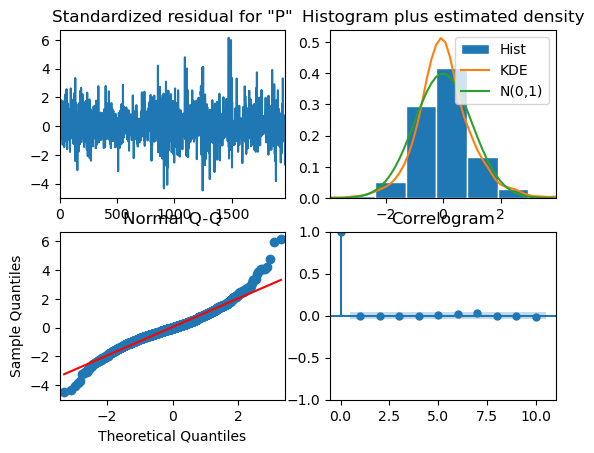

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1968
Model:                 ARIMA(0, 1, 4)   Log Likelihood                  -3.351
Date:                Tue, 04 Apr 2023   AIC                             16.701
Time:                        12:58:24   BIC                             44.622
Sample:                             0   HQIC                            26.962
                               - 1968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0425      0.019     -2.188      0.029      -0.081      -0.004
ma.L2         -0.0397      0.017     -2.326      0.020      -0.073      -0.006
ma.L3         -0.0006      0.021     -0.027      0.9

In [35]:
model = ARIMA(curr, order=(0,1,4))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


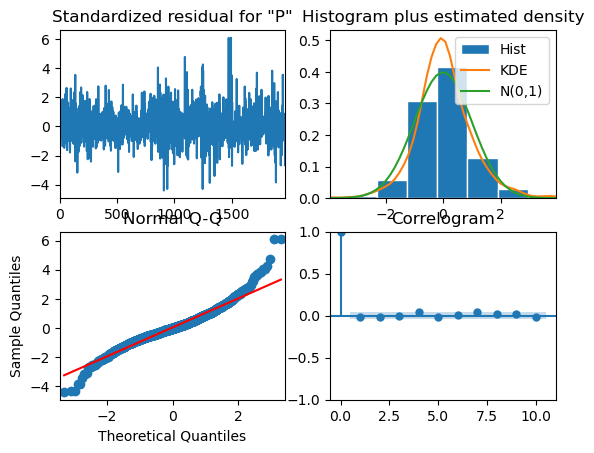

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1968
Model:                 ARIMA(2, 1, 2)   Log Likelihood                  -0.946
Date:                Tue, 04 Apr 2023   AIC                             11.892
Time:                        12:57:31   BIC                             39.814
Sample:                             0   HQIC                            22.153
                               - 1968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1765      0.023     51.231      0.000       1.131       1.222
ar.L2         -0.9414      0.023    -40.723      0.000      -0.987      -0.896
ma.L1         -1.2106      0.020    -59.078      0.0

In [34]:

model = ARIMA(curr, order=(2,1,2))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [36]:
order_aic_bic2=[]


            
            
for p in range(5,9):
    for q in range(5,9):
        try:
            model = ARIMA(curr, order=(p,1,q))
            results = model.fit()
            
            order_aic_bic2.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\si

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\si

In [37]:

order_df2 = pd.DataFrame(order_aic_bic2, columns=['p', 'q', 'aic', 'bic'])

print(order_df2.sort_values('aic'))

    p  q        aic         bic
10  7  7  21.601919  105.365891
7   6  8  22.516557  106.280529
14  8  7  22.973430  112.321667
11  7  8  25.961543  115.309780
0   5  5  26.176206   87.603119
8   7  5  26.884957   99.480399
1   5  6  26.948858   93.960036
15  8  8  27.127227  122.059728
4   6  5  27.897044   94.908222
2   5  7  28.011212  100.606655
5   6  6  29.044800  101.640242
3   5  8  29.853080  108.032787
6   6  7  30.174631  108.354338
9   7  6  30.323394  108.503101
12  8  5  30.565028  108.744735
13  8  6  32.257335  116.021308


In [40]:
curr_month = curr.resample('M').mean()

In [41]:
curr_month.head()

,Price
Date,
2015-01-31,62.230000
2015-02-28,62.214444
2015-03-31,62.698571
2015-04-30,62.938333
2015-05-31,63.947368


In [42]:
curr_month.tail()

,Price
Date,
2022-11-30,81.841429
2022-12-31,82.570000
2023-01-31,81.940952
2023-02-28,82.675000
2023-03-31,82.308000


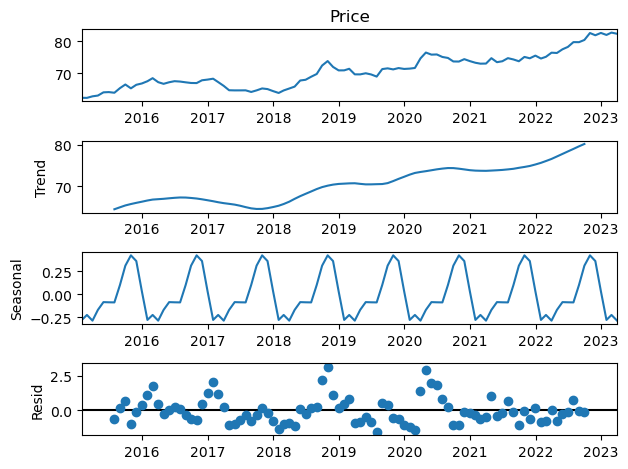

In [43]:

decomp = seasonal_decompose(curr_month.Price, period=12)

decomp.plot()
plt.show()

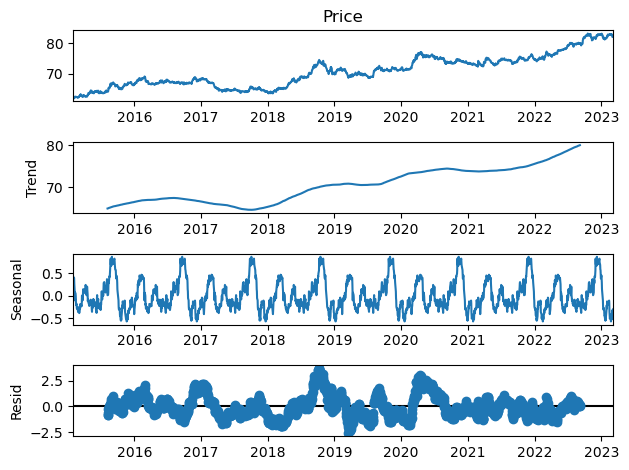

In [44]:
decomp = seasonal_decompose(curr.Price, period=252)

decomp.plot()
plt.show()

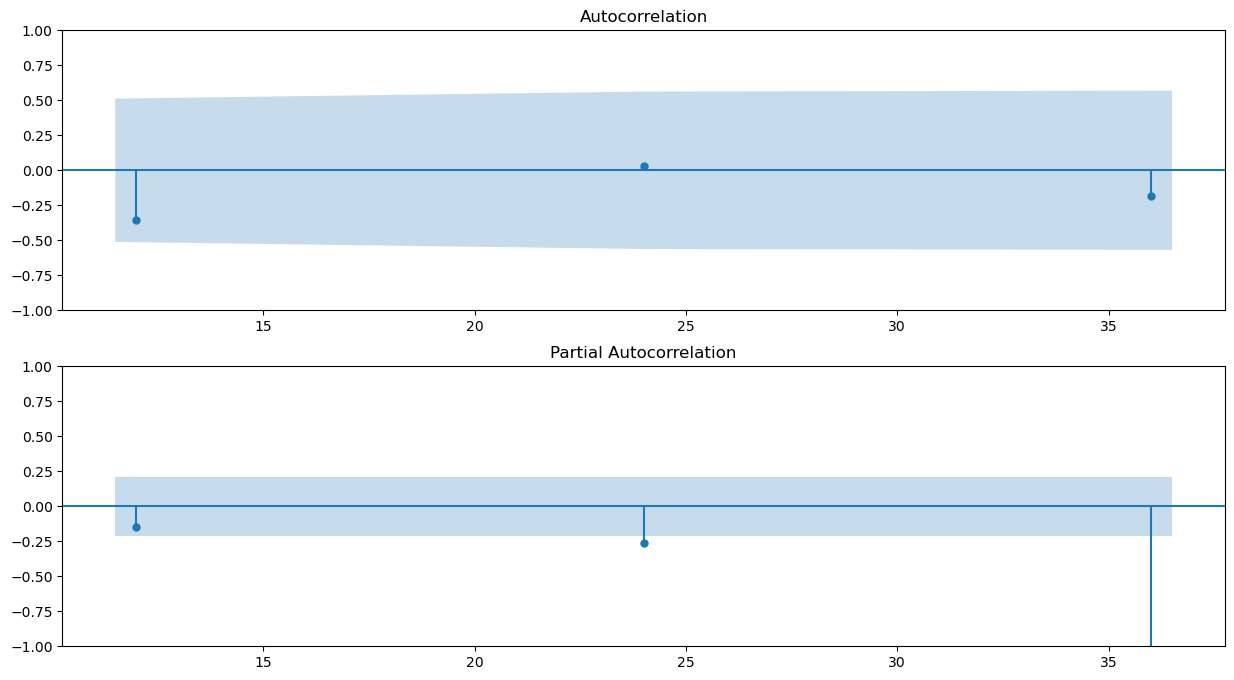

In [48]:

curr_month_2 = curr_month - curr_month.rolling(15).mean()
curr_month_2 = curr_month_2.dropna()

lagss = [12,24,36]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,8))

plot_acf(curr_month_2.Price, lags=lagss, zero=False, ax=ax1)
#plot_pacf(curr_month_2.Price, lags=lagss, zero=False, ax=ax2)

plt.show()

In [49]:

order_aic_bic3=[]


            
            
for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(curr, order=(2,1,2), seasonal_order=(p,1,q,12))
            results = model.fit()
            
            order_aic_bic3.append((p, q, results.aic, results.bic))
        except:
                print(p, q, None, None)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hp\anaconda3\lib\si

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:

order_df3 = pd.DataFrame(order_aic_bic3, columns=['p', 'q', 'aic', 'bic'])

print(order_df3.sort_values('aic'))

   p  q          aic          bic
1  0  1    70.552530   104.021403
2  0  2    70.740217   109.787235
7  2  1    73.983559   118.608723
5  1  2    78.655119   123.280283
4  1  1    83.551742   122.598760
8  2  2    84.165489   134.368799
6  2  0   522.305223   561.352241
3  1  0   725.037833   758.506706
0  0  0  1233.596593  1261.487320


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


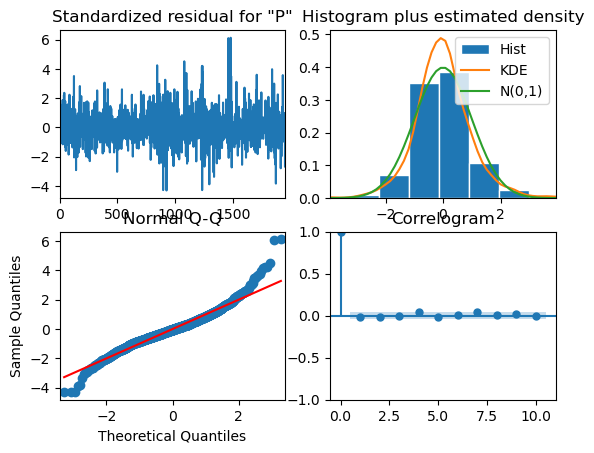

                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                 1968
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 -29.276
Date:                              Tue, 04 Apr 2023   AIC                             70.553
Time:                                      18:29:57   BIC                            104.021
Sample:                                           0   HQIC                            82.856
                                             - 1968                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1753      0.023     50.509      0.000       1.130       1.221
ar.L2         -0.94

In [51]:

model = SARIMAX(curr, order=(2,1,2), seasonal_order=(0,1,1,12))

results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


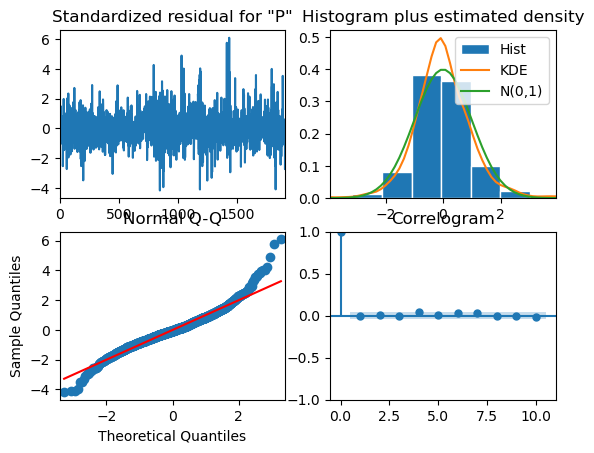

                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                 1968
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 63)   Log Likelihood                -123.344
Date:                              Tue, 04 Apr 2023   AIC                            258.688
Time:                                      18:39:46   BIC                            291.998
Sample:                                           0   HQIC                           270.949
                                             - 1968                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3124      0.348      0.899      0.369      -0.369       0.994
ar.L2         -0.49

In [52]:

model = SARIMAX(curr, order=(2,1,2), seasonal_order=(0,1,1,63))

results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


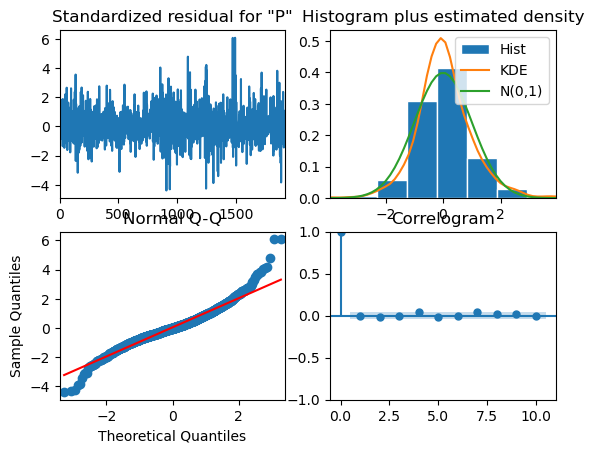

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1922
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   1.949
Date:                Tue, 04 Apr 2023   AIC                              6.103
Time:                        18:46:23   BIC                             33.906
Sample:                             0   HQIC                            16.332
                               - 1922                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1694      0.022     53.379      0.000       1.126       1.212
ar.L2         -0.9411      0.022    -43.368      0.000      -0.984      -0.899
ma.L1         -1.2062      0.020    -61.760      0.0

In [54]:

model = ARIMA(curr_train, order=(2,1,2))
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [61]:
forecast = results.get_forecast(steps=len(curr_test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
dates = curr_test.index

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [62]:
print(mean)

1922    82.867327
1923    82.875670
1924    82.859710
1925    82.833195
1926    82.817208
1927    82.823465
1928    82.845827
1929    82.866089
1930    82.868739
1931    82.852770
1932    82.831602
1933    82.821876
1934    82.830424
1935    82.849572
1936    82.863919
1937    82.862677
1938    82.847724
1939    82.831405
1940    82.826395
1941    82.835893
1942    82.851715
1943    82.861278
1944    82.857573
1945    82.844239
1946    82.832135
1947    82.830527
1948    82.840038
1949    82.852674
1950    82.858499
1951    82.853420
1952    82.841998
1953    82.833422
1954    82.834142
1955    82.843053
1956    82.852798
1957    82.855807
1958    82.850155
1959    82.840714
1960    82.834993
1961    82.837187
1962    82.845137
1963    82.852368
1964    82.853344
1965    82.847679
1966    82.840136
1967    82.836647
Name: predicted_mean, dtype: float64


In [59]:
print(len(curr_test))

46


In [60]:
print(len(mean))

46


In [63]:
print(dates)

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
               '2023-01-24', '2023-01-25', '2023-01-27', '2023-01-30',
               '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03',
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-13', '2023-02-14', '2023-02-15',
               '2023-02-16', '2023-02-17', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-27',
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-06', '2023-03-08'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [64]:
print(conf_int)

      lower Price  upper Price
1922    82.392558    83.342096
1923    82.216474    83.534867
1924    82.064607    83.654814
1925    81.921488    83.744902
1926    81.796075    83.838341
1927    81.697444    83.949487
1928    81.622257    84.069398
1929    81.555412    84.176766
1930    81.481173    84.256304
1931    81.394958    84.310581
1932    81.305692    84.357511
1933    81.227277    84.416475
1934    81.166925    84.493923
1935    81.119598    84.579545
1936    81.072250    84.655588
1937    81.014209    84.711146
1938    80.945346    84.750101
1939    80.875484    84.787327
1940    80.815974    84.836816
1941    80.770683    84.901102
1942    80.733332    84.970097
1943    80.692796    85.029760
1944    80.641937    85.073209
1945    80.582936    85.105543
1946    80.525023    85.139246
1947    80.476817    85.184237
1948    80.439653    85.240423
1949    80.406924    85.298424
1950    80.369571    85.347427
1951    80.323221    85.383618
1952    80.271317    85.412680
1953    

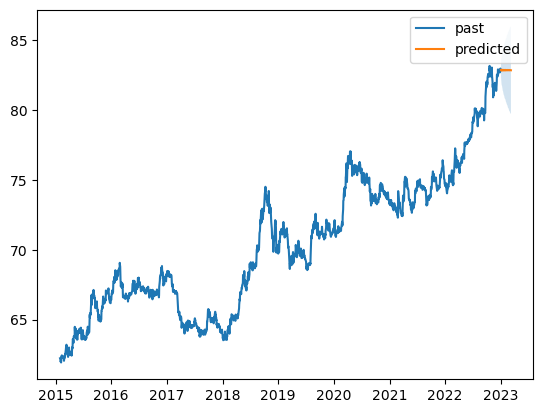

In [65]:
plt.figure()

plt.plot(curr_train.index, curr_train, label='past')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates,conf_int['lower Price'], conf_int['upper Price'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

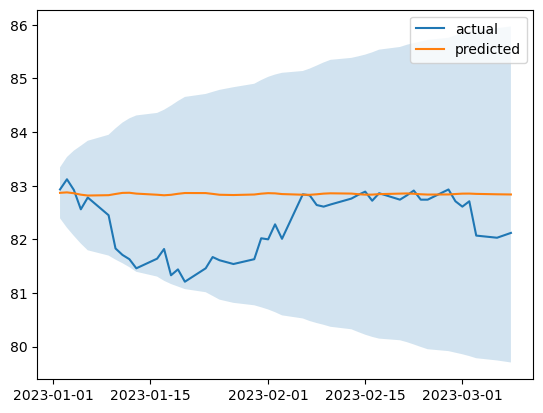

In [66]:
plt.figure()

plt.plot(curr_test.index, curr_test, label='actual')

plt.plot(dates, mean, label='predicted')

plt.fill_between(dates,conf_int['lower Price'], conf_int['upper Price'], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [67]:
type(forecast)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [68]:
mean.values

array([82.86732715, 82.87567042, 82.85971029, 82.83319502, 82.81720778,
       82.82346505, 82.84582735, 82.86608918, 82.86873881, 82.85276952,
       82.83160164, 82.82187622, 82.83042378, 82.84957153, 82.86391896,
       82.86267745, 82.84772371, 82.83140525, 82.82639501, 82.83589284,
       82.85171453, 82.86127822, 82.85757266, 82.84423933, 82.83213458,
       82.83052692, 82.84003833, 82.85267383, 82.85849883, 82.8534197 ,
       82.84199846, 82.83342235, 82.83414164, 82.84305348, 82.85279804,
       82.85580662, 82.85015455, 82.84071377, 82.83499276, 82.83718705,
       82.84513691, 82.85236844, 82.85334361, 82.8476786 , 82.84013627,
       82.83664747])

In [69]:
type(mean.values)

numpy.ndarray

In [70]:
type(curr_test.Price)

pandas.core.series.Series

In [71]:
type(mean)

pandas.core.series.Series

In [72]:
rms = sqrt(mean_squared_error(curr_test.Price,mean))
print(rms)

0.7805622891632165
